In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import methods
import pymaster as nmt
from importlib import reload

/tmp/ipykernel_48779/2095638674.py:4: RuntimeWarning: invalid value encountered in true_divide
  input_cl /= ell_input*(ell_input+1)/2/np.pi


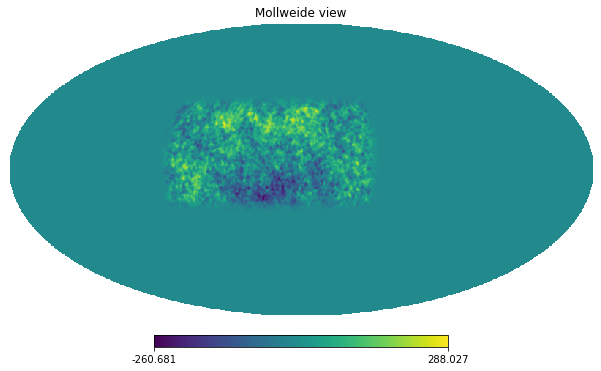

In [2]:
reload(methods)
ell_input, TT, TE, EE, BB, PP = np.loadtxt('cl.txt', unpack=True)
input_cl = np.array([TT, TE, EE, BB])
input_cl /= ell_input*(ell_input+1)/2/np.pi 
for c in input_cl: c[0] = 0

nside = 128
lmax = 3*nside-1
npix = 12*nside**2
sigmab = hp.nside2resol(nside)
fwhm = (8*np.log(2))**0.5 * sigmab
pixels = methods.create_pixels()

ell_input = ell_input[:lmax+1]
TT = input_cl[0][:lmax+1]
input_map = hp.synfast(TT, nside, sigma=sigmab)
# input_map = hp.synfast(np.ones(lmax+1), nside, sigma=sigmab)

mask = np.zeros(npix)
mask[pixels[0]] = 1
mask_apo = nmt.mask_apodization(mask, 2.5, apotype="Smooth")    
hp.mollview(mask_apo * input_map)

In [13]:
cl_fb = np.load('sims/cl_fb.npy')
cl_fr = np.load('sims/cl_fr.npy')
fl = np.load('sims/fl.npy')
ells = np.load('sims/ells.npy')

In [14]:
ells, cl_data = methods.sim_cl2cl(TT, pixels, fl, n_sims=1, n_obs=100)

  0%|                                                     | 0/1 [00:00<?, ?it/s]/scratch/yuyang/destripe/methods.py:81: RuntimeWarning: invalid value encountered in true_divide
  output_map = PT(filtered_tod, pixels, npix)/PTP(pixels, npix)
100%|█████████████████████████████████████████████| 1/1 [00:30<00:00, 30.84s/it]


In [4]:
# reload(methods)
# fl = methods.sim_fl(TT, pixels, n_sims=10, n_obs=10)

# plt.plot(fl)
# plt.xlim([0, 2*nside])
# plt.ylim([0,1])

# ells, cl_fb = methods.sim_cl2cl(TT, pixels, fl, n_sims=10, n_obs=10)
# ells, cl_fr = methods.sim_cl2cl(TT, pixels, n_sims=10, n_obs=10, replace=True)

In [5]:
bin_width=np.median(np.diff(ells))/2

fb_mean = np.mean(cl_fb, axis=0)
fb_std = np.std(cl_fb, axis=0)

fr_mean = np.mean(cl_fr, axis=0)
fr_std = np.std(cl_fr, axis=0)

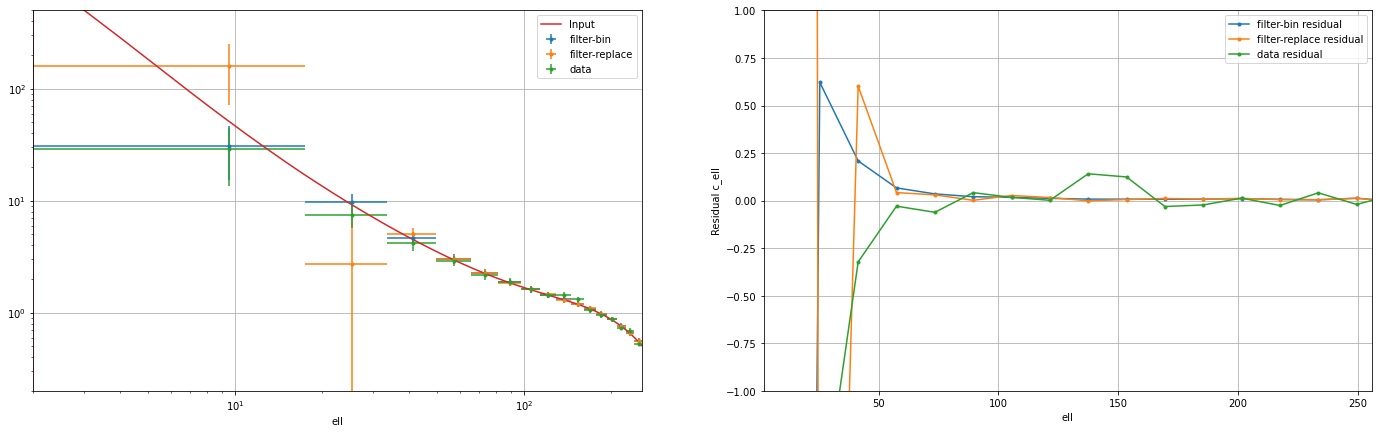

In [16]:
fig, axes = plt.subplots(1,2, figsize=(24, 7))
interp_input = np.interp(ells, ell_input, TT)

axes[0].errorbar(ells, fb_mean, yerr=fb_std, xerr=bin_width, fmt='.', label='filter-bin')
axes[0].errorbar(ells, fr_mean, yerr=fr_std, xerr=bin_width, fmt='.', label='filter-replace')
axes[0].errorbar(ells, cl_data[0], yerr=fb_std, xerr=bin_width, fmt='.', label='data')

axes[0].plot(ell_input, TT, label='Input')
axes[0].set_ylim([2e-1,5e2])
axes[0].loglog()

axes[1].plot(ells, fb_mean - interp_input , marker='.', label='filter-bin residual')
axes[1].plot(ells, fr_mean - interp_input, marker='.', label='filter-replace residual')
axes[1].plot(ells, cl_data[0] - interp_input, marker='.', label='data residual')

axes[1].set_ylabel('Residual c_ell')
axes[1].set_ylim([-1, 1])

for ax in axes:
    ax.set_xlabel('ell')
    ax.legend()
    ax.grid()  
    ax.set_xlim([2e0,2*nside])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


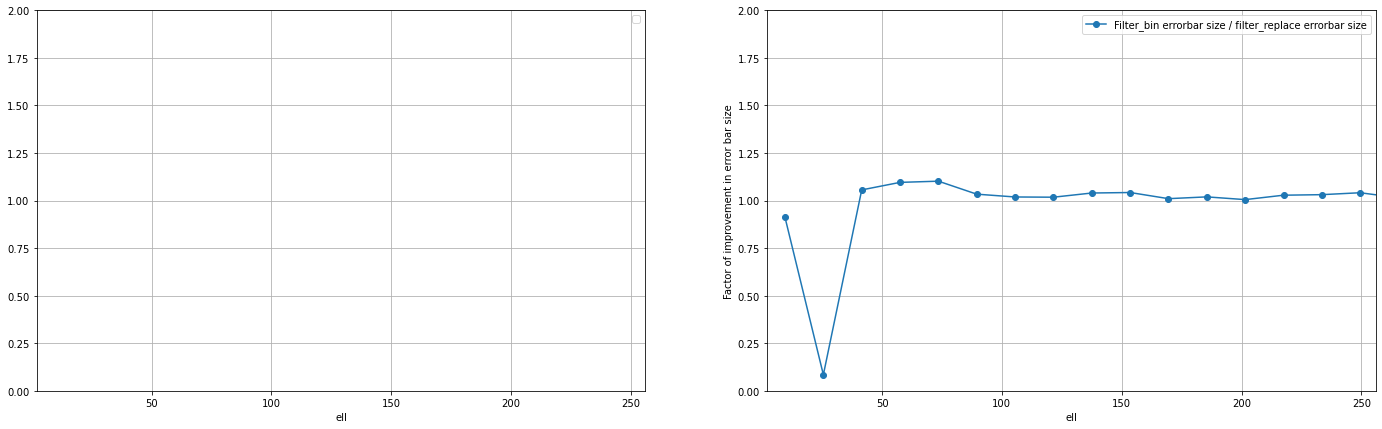

In [7]:
fig, axes = plt.subplots(1,2, figsize=(24, 7))
# axes[0].plot(ells, (fb_std/fb_mean) / (fb_std/fb_mean), marker='o', label='Filter bin')
# axes[0].set_ylabel('Factor of inflation of error size by transfer func')

axes[1].plot(ells, (fb_std/fb_mean)/(fr_std/fr_mean), marker='o', label='Filter_bin errorbar size / filter_replace errorbar size')
axes[1].set_ylabel('Factor of improvement in error bar size')

for ax in axes:
    ax.grid()
    ax.legend()
    ax.set_xlabel('ell')
    ax.set_ylim([0,2])
    ax.set_xlim([2, 2*nside])

In [11]:
np.mean(((fb_std/fb_mean)/(fr_std/fr_mean))[2:15]) 

1.0382689396660574